In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('file4.csv')
df.head()

,Unnamed: 0,Title,Rating,Price,Processor,RAM,Display Size,Storage Capacity,Brand,SSD_Capacity,Ram,Ram_Type,Display_Size,EMMC_Storage(in_GB),HDD_Storage(in_GB)
0,0,Lenovo Intel Celeron Dual Core - (8 GB/256 GB ...,4.1,25685.0,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,39.62 cm (15.6 Inch) Display,256 GB SSD,LENOVO,256.0,8.0,DDR4,39.62,0.0,0.0
1,1,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,51990.0,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,39.62 cm (15.6 inch) Display,512 GB SSD,ASUS,512.0,8.0,DDR4,39.62,0.0,0.0
2,2,ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...,4.2,38990.0,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,39.62 cm (15.6 Inch) Display,512 GB SSD,ASUS,512.0,8.0,DDR4,39.62,0.0,0.0
3,3,ASUS VivoBook 14 (2021) Celeron Dual Core - (4...,4.1,23990.0,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,35.56 cm (14 inch) Display,256 GB SSD,ASUS,256.0,4.0,DDR4,35.56,0.0,0.0
4,4,RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB ...,4.1,39990.0,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,39.62 cm (15.6 inch) Display,512 GB SSD,MI,512.0,8.0,DDR4,39.62,0.0,0.0


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/var/folders/cb/z93qyqln7w38w_7mqz8z10c40000gn/T/ipykernel_6869/3462665596.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [4]:
df.shape

(817, 15)

In [5]:
df.columns

Index(['Unnamed: 0', 'Title', 'Rating', 'Price', 'Processor', 'RAM',
       'Display Size', 'Storage Capacity', 'Brand', 'SSD_Capacity', 'Ram',
       'Ram_Type', 'Display_Size', 'EMMC_Storage(in_GB)',
       'HDD_Storage(in_GB)'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0','Display Size','RAM','Title','Storage Capacity'],axis=1,inplace=True)
df.head()

,Rating,Price,Processor,Brand,SSD_Capacity,Ram,Ram_Type,Display_Size,EMMC_Storage(in_GB),HDD_Storage(in_GB)
0,4.1,25685.0,Intel Celeron Dual Core Processor,LENOVO,256.0,8.0,DDR4,39.62,0.0,0.0
1,4.4,51990.0,Intel Core i5 Processor (10th Gen),ASUS,512.0,8.0,DDR4,39.62,0.0,0.0
2,4.2,38990.0,Intel Core i3 Processor (11th Gen),ASUS,512.0,8.0,DDR4,39.62,0.0,0.0
3,4.1,23990.0,Intel Celeron Dual Core Processor,ASUS,256.0,4.0,DDR4,35.56,0.0,0.0
4,4.1,39990.0,Intel Core i5 Processor (11th Gen),MI,512.0,8.0,DDR4,39.62,0.0,0.0


In [7]:
indices_to_drop = [814, 815, 816]  # List of row indices to drop
df = df.drop(indices_to_drop)

In [8]:
df.isnull().sum()

Rating                 287
Price                  0  
Processor              0  
Brand                  0  
SSD_Capacity           0  
Ram                    0  
Ram_Type               1  
Display_Size           0  
EMMC_Storage(in_GB)    0  
HDD_Storage(in_GB)     0  
dtype: int64

In [9]:
fill_value = 0  # Specify the value you want to fill nulls with
df['Rating'] = df['Rating'].fillna(fill_value)

In [10]:
df=df.dropna()

In [11]:
df.to_csv('final.csv')

### Writing a Function to evaluate the trained Model 

In [12]:
def eval_model(y_test,x_test,model):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2s = r2_score(y_test,y_pred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

### Checking the normality of target variable

/Users/mridultomar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


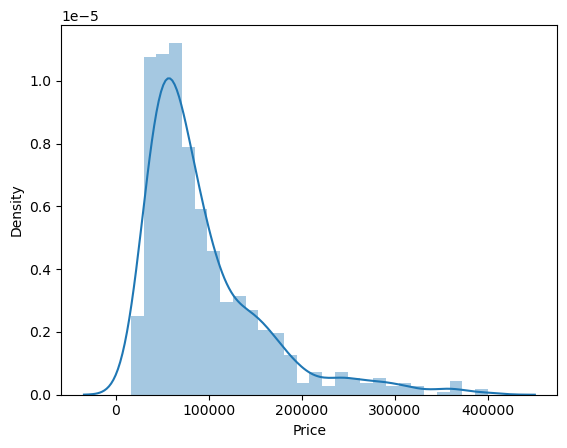

In [13]:
sns.distplot(df['Price'])
plt.savefig('Not_Normal_Dist.png', format='png')
plt.show()

#### As data is not normally distributed we can use the following method to make it normal
1) log transformation (We will use this method)<br> 
2) sqr, sqrt, cube<br>
3) box-cox Transformation<br>

/Users/mridultomar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


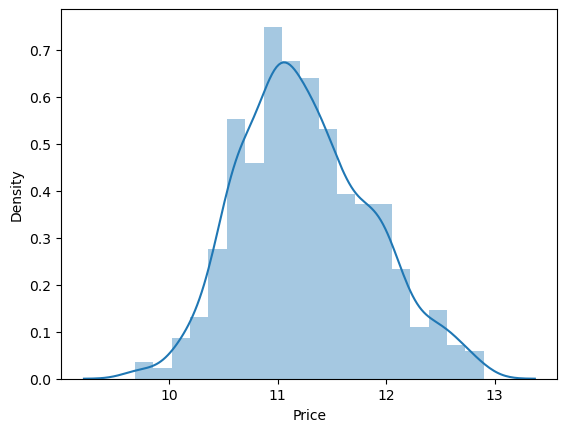

In [14]:
sns.distplot(np.log(df['Price']))
plt.savefig('Normal_Dist.png', format='png')
plt.show()

## EDA

#### Almost most part of the EDA have been executed through PowerBI 

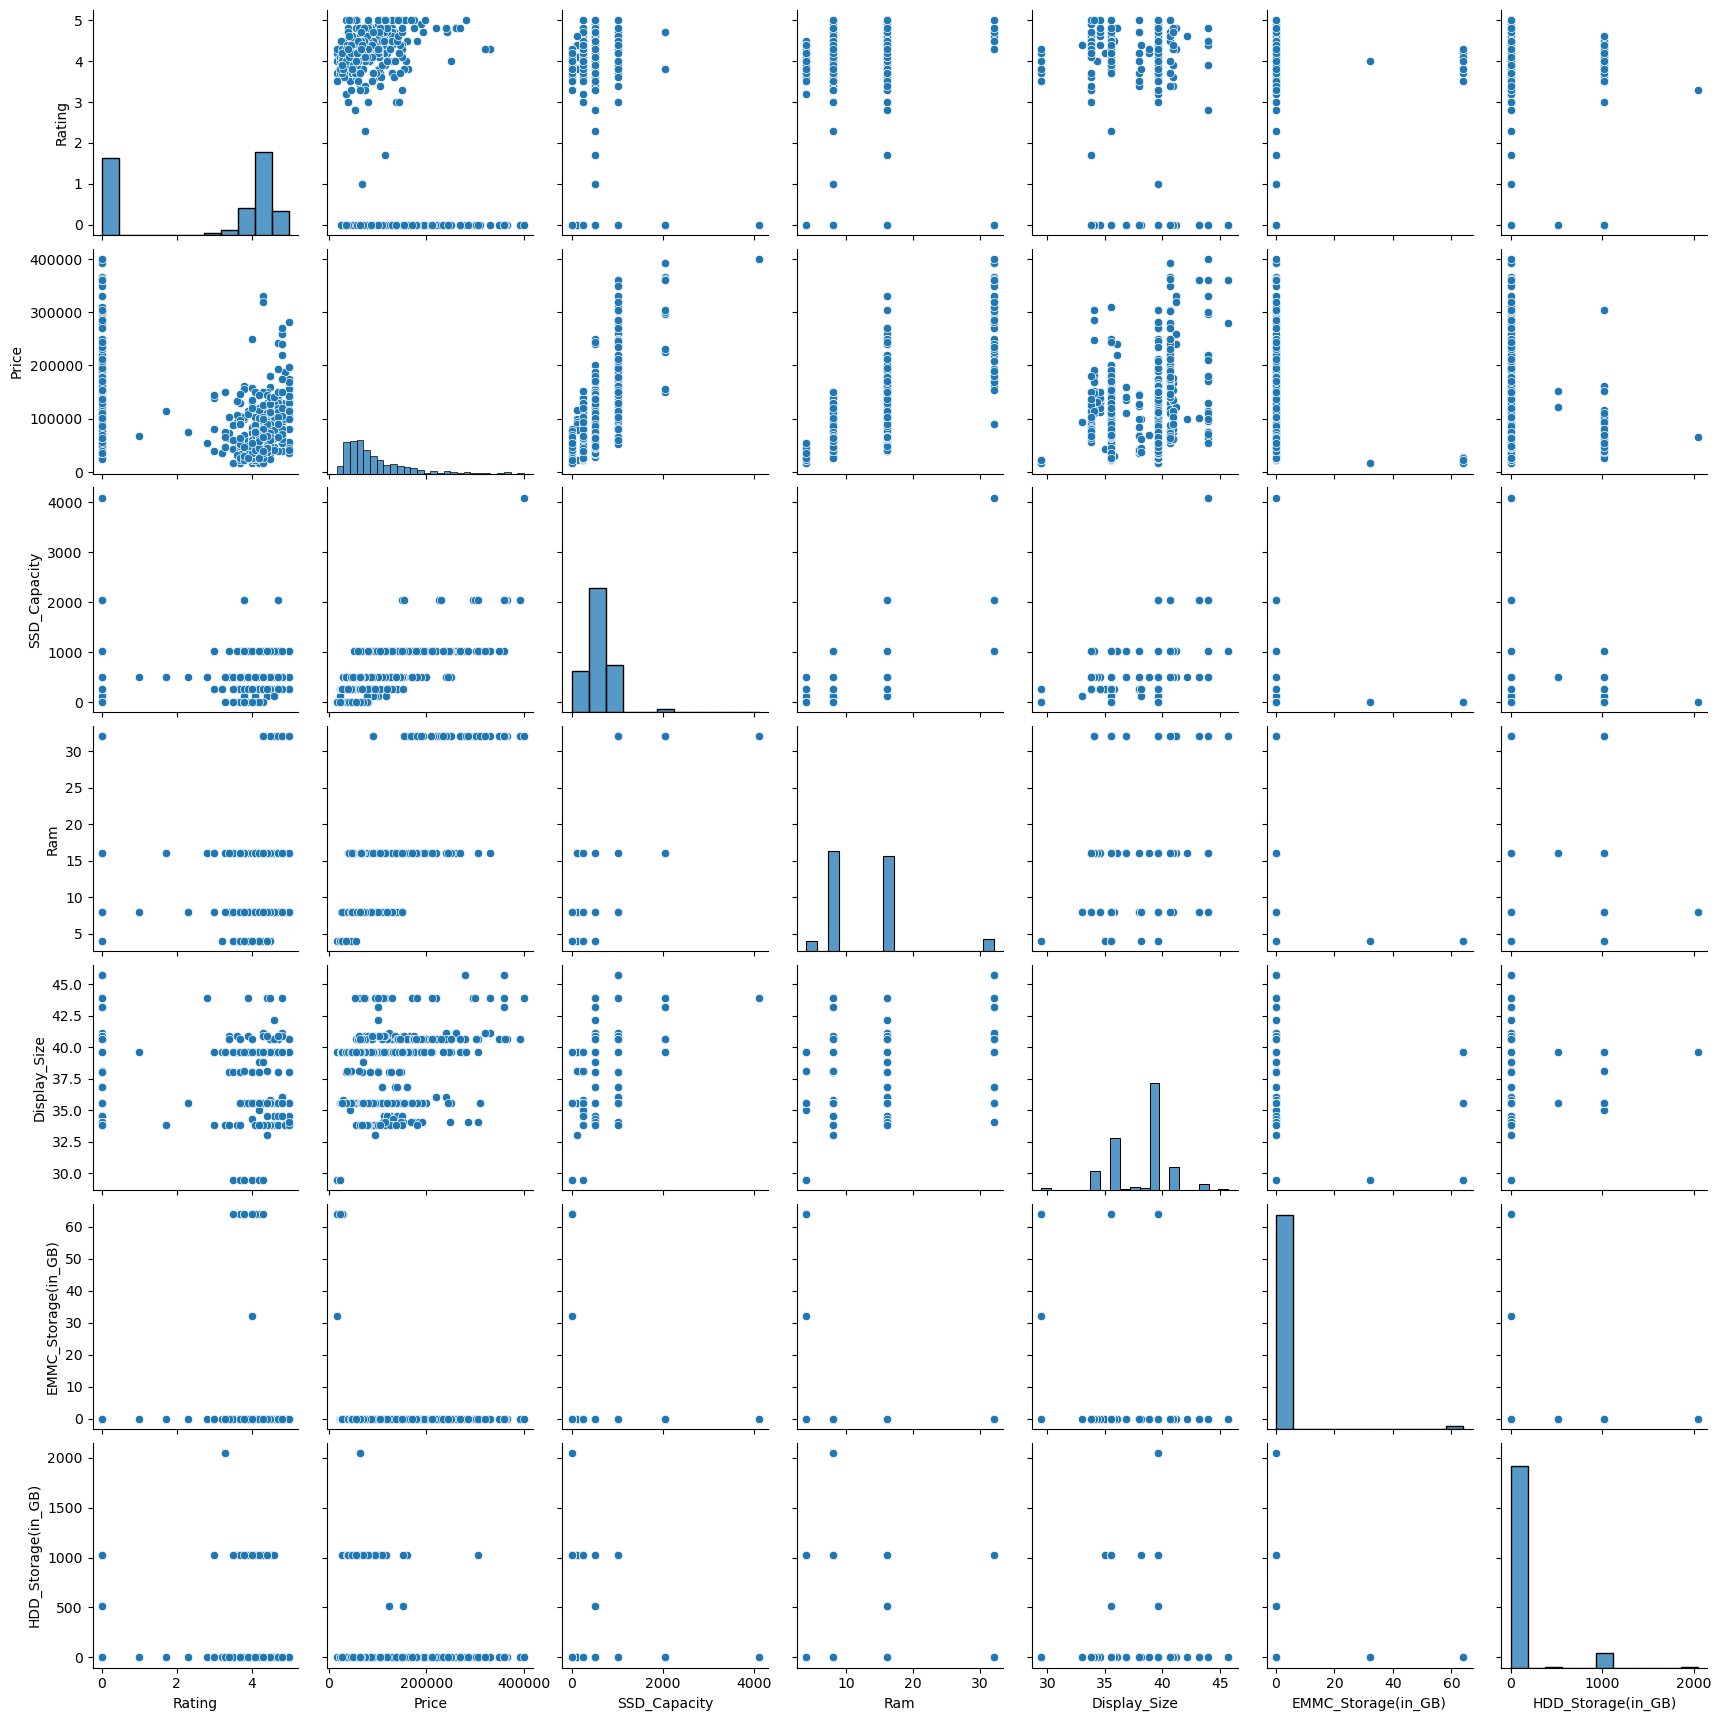

In [15]:
sns.pairplot(data=df)
plt.savefig('Pairplot.png', format='png')
plt.show()

In [16]:
corr = df.corr()

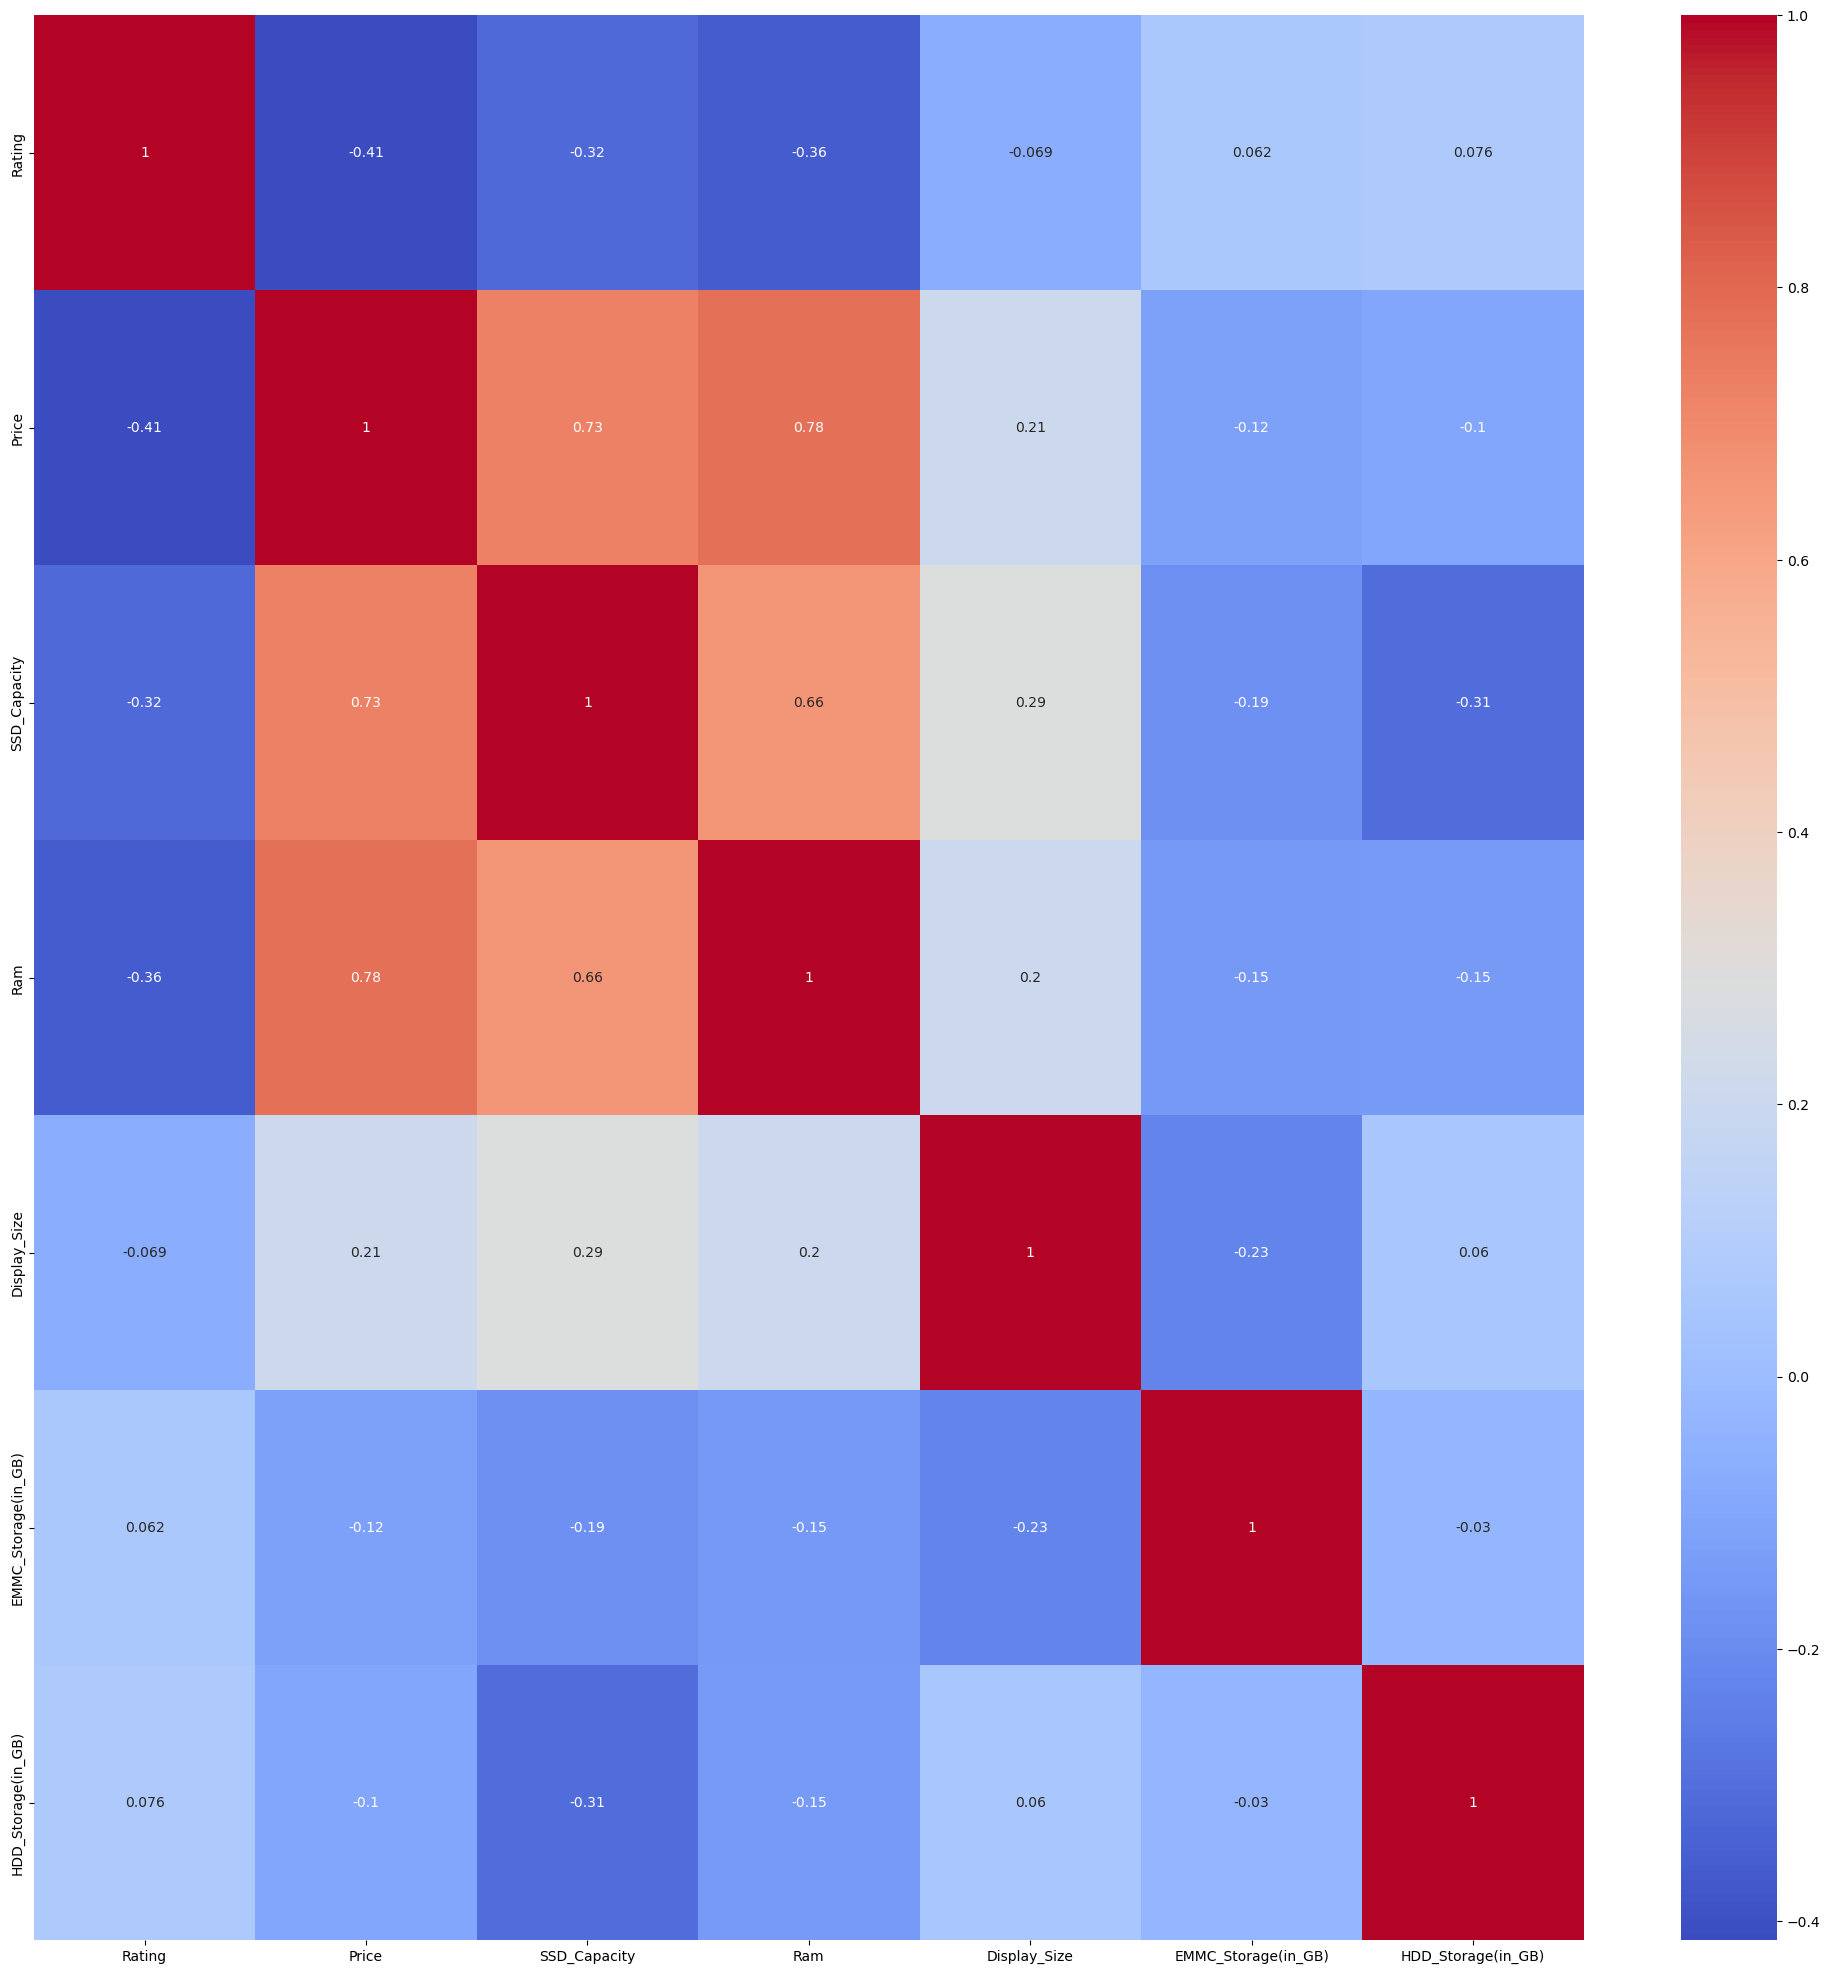

In [17]:
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.savefig('Correltaion.png', format='png')
plt.show()

In [18]:
df.describe(percentiles=[0.01,0.02,0.03,0.05]).T

,count,mean,std,min,1%,2%,3%,5%,50%,max
Rating,813.0,2.754982,2.062870,0.00,0.00,0.00,0.00,0.00,4.00,5.00
Price,813.0,93532.238622,64453.823735,16100.00,22910.80,25990.00,28170.00,32293.40,72990.00,399990.00
SSD_Capacity,813.0,591.990160,350.600105,0.00,0.00,0.00,0.00,256.00,512.00,4096.00
Ram,813.0,12.595326,6.231955,4.00,4.00,4.00,4.00,8.00,8.00,32.00
Display_Size,813.0,38.241451,2.583673,29.46,33.78,33.78,33.78,33.78,39.62,45.72
EMMC_Storage(in_GB),813.0,0.747847,6.789708,0.00,0.00,0.00,0.00,0.00,0.00,64.00
HDD_Storage(in_GB),813.0,70.533825,263.194725,0.00,0.00,0.00,0.00,0.00,0.00,2048.00


In [19]:
df.describe(percentiles=[0.90,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,50%,90%,95%,97%,98%,99%,max
Rating,813.0,2.754982,2.062870,0.00,4.00,4.60,4.80,4.80,5.00,5.00,5.00
Price,813.0,93532.238622,64453.823735,16100.00,72990.00,173990.00,239900.00,273830.00,299032.40,329979.20,399990.00
SSD_Capacity,813.0,591.990160,350.600105,0.00,512.00,1024.00,1024.00,1024.00,1024.00,2048.00,4096.00
Ram,813.0,12.595326,6.231955,4.00,8.00,16.00,32.00,32.00,32.00,32.00,32.00
Display_Size,813.0,38.241451,2.583673,29.46,39.62,40.64,40.89,41.15,43.94,43.94,45.72
EMMC_Storage(in_GB),813.0,0.747847,6.789708,0.00,0.00,0.00,0.00,0.00,0.00,60.16,64.00
HDD_Storage(in_GB),813.0,70.533825,263.194725,0.00,0.00,0.00,1024.00,1024.00,1024.00,1024.00,2048.00


In [20]:
def high_corr_feat(corr,thresh):
    res = []
    for i in range(len(corr.columns)):  # i = 0,1,2..,29
        for j in range(i):              # i=1,j=0
            if corr.iloc[i,j] >= thresh:
                res.append(corr.columns[i])
    res = list(set(res))
    return res
    

In [21]:
feat_to_drop = high_corr_feat(corr,0.8)
print(feat_to_drop)
print(len(feat_to_drop))

[]
0


In [22]:
df.dtypes

Rating                 float64
Price                  float64
Processor              object 
Brand                  object 
SSD_Capacity           float64
Ram                    float64
Ram_Type               object 
Display_Size           float64
EMMC_Storage(in_GB)    float64
HDD_Storage(in_GB)     float64
dtype: object

In [23]:
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index(['Processor', 'Brand', 'Ram_Type'], dtype='object')


### Encoding the categorical columns

In [24]:
# Making a dictionary to encode the processor column
items = ['Intel Celeron Dual Core Processor',
         'Intel Core i5 Processor (10th Gen)',
         'Intel Core i3 Processor (11th Gen)',
         'Intel Core i5 Processor (11th Gen)',
         'Apple M1 Processor',
         'AMD Ryzen 5 Hexa Core Processor',
         'Intel Core i5 Processor (12th Gen)',
         'AMD Athlon Dual Core Processor',
         'AMD Ryzen 7 Octa Core Processor',
         'AMD Ryzen 5 Quad Core Processor',
         'AMD Ryzen 3 Quad Core Processor',
         'Intel Core i9 Processor (12th Gen)',
         'Intel Core i7 Processor (12th Gen)',
         'Apple M2 Processor',
         'Intel Core i7 Processor (11th Gen)',
         'Apple M2 Pro Processor',
         'Intel Core i7 Processor (13th Gen)',
         'Intel Core i3 Processor (12th Gen)',
         'Intel Core i9 Processor (11th Gen)',
         'Intel Core i9 Processor (13th Gen)',
         'AMD Ryzen 3 Dual Core Processor',
         'Apple M1 Max Processor',
         'Apple M2 Max Processor',
         'AMD Dual Core Processor',
         'Intel Pentium Silver Processor',
         'Intel Core i3 Processor (10th Gen)',
         'MediaTek MediaTek Kompanio 500 Processor',
         'Intel Core i3 Processor (13th Gen)',
         'AMD Ryzen 9 Octa Core Processor',
         'Intel Pentium Quad Core Processor',
         'Intel Core i5 Processor (13th Gen)',
         'Intel Celeron Quad Core Processor',
         'AMD Ryzen 7 Hexa Core Processor',
         'Apple M1 Pro Processor',
         'Intel Core i7 Processor (10th Gen)',
         'Intel Core i7 Processor (7th Gen)',
         'AMD Ryzen 7 Quad Core Processor',
         'Intel Core i9 Processor (8th Gen)',
         'Intel Core i9 Processor (10th Gen)',
         'Intel Core i7 Processor (8th Gen)',
         'Intel Core i7 Processor (6th Gen)',
         'AMD Ryzen 5 Dual Core Processor',
         'Intel Core i5 Processor (8th Gen)',
         'Intel Core i5 Processor (9th Gen)',
         'Intel Core i3 Processor (7th Gen)',
         'MediaTek MediaTek MT8788 Processor',
         'Intel Core i5 Processor (7th Gen)',
         'Intel Core i5 Processor (4th Gen)']

encoding_dict_processor = {item: i+1 for i, item in enumerate(items)}
print(encoding_dict_processor)

{'Intel Celeron Dual Core Processor': 1, 'Intel Core i5 Processor (10th Gen)': 2, 'Intel Core i3 Processor (11th Gen)': 3, 'Intel Core i5 Processor (11th Gen)': 4, 'Apple M1 Processor': 5, 'AMD Ryzen 5 Hexa Core Processor': 6, 'Intel Core i5 Processor (12th Gen)': 7, 'AMD Athlon Dual Core Processor': 8, 'AMD Ryzen 7 Octa Core Processor': 9, 'AMD Ryzen 5 Quad Core Processor': 10, 'AMD Ryzen 3 Quad Core Processor': 11, 'Intel Core i9 Processor (12th Gen)': 12, 'Intel Core i7 Processor (12th Gen)': 13, 'Apple M2 Processor': 14, 'Intel Core i7 Processor (11th Gen)': 15, 'Apple M2 Pro Processor': 16, 'Intel Core i7 Processor (13th Gen)': 17, 'Intel Core i3 Processor (12th Gen)': 18, 'Intel Core i9 Processor (11th Gen)': 19, 'Intel Core i9 Processor (13th Gen)': 20, 'AMD Ryzen 3 Dual Core Processor': 21, 'Apple M1 Max Processor': 22, 'Apple M2 Max Processor': 23, 'AMD Dual Core Processor': 24, 'Intel Pentium Silver Processor': 25, 'Intel Core i3 Processor (10th Gen)': 26, 'MediaTek MediaTek 

In [25]:
# Apply encoding using the dictionary
df['Processor'] = df['Processor'].map(encoding_dict_processor)


In [26]:
# Making a dictionary to encode the brand column
items2=['LENOVO', 'ASUS', 'MI', 'HP', 'APPLE', 'DELL', 'MSI', 'INFINIX',
       'REALME', 'ACER', 'SAMSUNG', 'GIGABYTE', 'MICROSOFT', 'SONY',
       'PRIMEBOOK', 'AVITA', 'NOKIA', 'LG']

encoding_dict_brand = {item: i+1 for i, item in enumerate(items2)}
print(encoding_dict_brand)

{'LENOVO': 1, 'ASUS': 2, 'MI': 3, 'HP': 4, 'APPLE': 5, 'DELL': 6, 'MSI': 7, 'INFINIX': 8, 'REALME': 9, 'ACER': 10, 'SAMSUNG': 11, 'GIGABYTE': 12, 'MICROSOFT': 13, 'SONY': 14, 'PRIMEBOOK': 15, 'AVITA': 16, 'NOKIA': 17, 'LG': 18}


In [27]:
# Apply encoding using the dictionary
df['Brand'] = df['Brand'].map(encoding_dict_brand)


In [28]:
# Making a dictionary to encode the ram_type column
items3=['DDR4', 'DDR5', 'LPDDR5', 'LPDDR4X', 'Unified', 'LPDDR4', 'GDDR6',
       'GDDR5', 'LPDDR3', 'DDR3']
encoding_dict_ramtype = {item: i+1 for i, item in enumerate(items3)}
print(encoding_dict_ramtype)

{'DDR4': 1, 'DDR5': 2, 'LPDDR5': 3, 'LPDDR4X': 4, 'Unified': 5, 'LPDDR4': 6, 'GDDR6': 7, 'GDDR5': 8, 'LPDDR3': 9, 'DDR3': 10}


In [29]:
# Apply encoding using the dictionary
df['Ram_Type'] = df['Ram_Type'].map(encoding_dict_ramtype)


In [30]:
# from sklearn.preprocessing import LabelEncoder

In [31]:
# lb = LabelEncoder()

In [32]:
# for i in cat_cols:
    # df[i] = lb.fit_transform(df[i])

In [33]:
df.dtypes

Rating                 float64
Price                  float64
Processor              int64  
Brand                  int64  
SSD_Capacity           float64
Ram                    float64
Ram_Type               int64  
Display_Size           float64
EMMC_Storage(in_GB)    float64
HDD_Storage(in_GB)     float64
dtype: object

### Select X and Y

In [34]:
x = df.drop('Price',axis=1)  # x = df1.iloc[:,:-1] = independent features
y = np.log(df['Price'])      # y = df1.iloc[:,-1]  =  
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(813, 9)
(813,)


### Splitting data into train data and test data

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(609, 9)
(204, 9)
(609,)
(204,)


### OLS

In [36]:
import statsmodels.api as sm  # OLS

In [37]:
x = sm.add_constant(x)
ols_model = sm.OLS(y,x).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     235.0
Date:                Sat, 17 Jun 2023   Prob (F-statistic):          3.76e-218
Time:                        19:10:28   Log-Likelihood:                -213.22
No. Observations:                 813   AIC:                             446.4
Df Residuals:                     803   BIC:                             493.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.3469      0.181     57.194      0.000       9.992      10.702
Rating                 -0.0398      0.006     -6.851      0.000      -0.051      -0.028
Processor               0.0037      0.001      3.396      0.001       0.002       0.006
Brand                  -0.0058      0.004     -1.540      0.124      -0.013       0.002
SSD_Capacity            0.0006   4.63e-05     12.312      0.000       0.000       0.001
Ram                     0.0441      0.002     17.910      0.000       0.039       0.049
Ram_Type                0.0587      0.007      8.783      0.000       0.046       0.072
Display_Size           -0.0004      0.005     -0.091      0.928      -0.010       0.009
EMMC_Storage(in_GB)    -0.0118      0.002     -6.807      0.000      -0.015      -0.008
HDD_Storage(in_GB)      0.0002   4.63e-05      3.268      0.001    6.05e-05       0.000
==============================================================================
Omnibus:                        4.203   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                4.585
Skew:                           0.085   Prob(JB):                        0.101
Kurtosis:                       3.326   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Building

### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
print('Training Score', lr.score(x_train,y_train)) 
print('Testing Score', lr.score(x_test,y_test))

Training Score 0.7205031386954672
Testing Score 0.7300823452369604


In [41]:
lr_dict={'Train Score':lr.score(x_train,y_train),'Test Score':lr.score(x_test,y_test)}

In [42]:
eval_model(y_test,x_test,lr)

MAE 0.24379649964230388
MSE 0.0973526514508644
RMSE 0.312013864196552
R2_Score 0.7300823452369604


#### Cross Validation on LinearRegression

In [43]:
from sklearn.model_selection import cross_val_score, KFold

lr_model = LinearRegression()
kfold = KFold(n_splits=12)
cvs = cross_val_score(lr_model,x,y,cv=kfold,scoring='r2')
print(cvs)
print(np.mean(cvs))

[0.56864696 0.8141512  0.7648698  0.72614276 0.77228839 0.70325483
 0.43014869 0.68309749 0.5875473  0.74440911 0.66820449 0.5322942 ]
0.6662546012256291


#### Inference
1) Model is genertaing +80% R2 only at a particular split. Linear Regression model is not robust.

In [44]:
model1=pd.DataFrame(lr_dict,index=['Linear Regression'])
model1

,Train Score,Test Score
Linear Regression,0.720503,0.730082


### ElasticNet Reg

In [45]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=1)  # alpha represents the lambda from the cost function of ElasticNet Reg 
# alpha is the hyperparameter
enet.fit(x_train,y_train)

ElasticNet(alpha=1)

In [46]:
print('Train score ElasticNet',enet.score(x_train,y_train))
print('Test score ElasticNet',enet.score(x_test,y_test))

Train score ElasticNet 0.6271425577718444
Test score ElasticNet 0.6436910445317563


In [47]:
enet_dict={'Train Score':enet.score(x_train,y_train),'Test Score':enet.score(x_test,y_test)}

In [48]:
model2=pd.DataFrame(enet_dict,index=['ElasticNet'])
model2

,Train Score,Test Score
ElasticNet,0.627143,0.643691


#### ElasticNet CV

In [49]:
from sklearn.linear_model import ElasticNetCV

In [50]:
enetcv = ElasticNetCV(alphas=np.arange(0.1,1,0.01),cv=20)
enetcv.fit(x,y)

ElasticNetCV(alphas=array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
             cv=20)

### DecisionTreeRegressor with Hyperparameters tuning

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [52]:
dt_regressor = DecisionTreeRegressor()

In [53]:
param_grid = {
    'max_depth': list(range(3,10,1)),
    'min_samples_split': list(range(2,20,1)),
    'min_samples_leaf': list(range(1,10,1))
}


In [54]:
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18,
                                               19]},
             scoring='neg_mean_squared_error')

In [55]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [56]:
gs_based_model = DecisionTreeRegressor(**grid_search.best_params_)
gs_based_model.fit(x_train,y_train)
eval_model(y_test,x_test,gs_based_model)

MAE 0.19835227651257958
MSE 0.07109482480082653
RMSE 0.2666361280862489
R2_Score 0.80288417326041


In [57]:
dt_dict={'Train Score':gs_based_model.score(x_train,y_train),'Test Score':gs_based_model.score(x_test,y_test)}

In [58]:
model3=pd.DataFrame(dt_dict,index=['Decision Tree Regressor with Hyperparameter Tuning'])
model3

,Train Score,Test Score
Decision Tree Regressor with Hyperparameter Tuning,0.909126,0.802884


### RandomForestRegressor with Hyperparameters tuning

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf_regressor = RandomForestRegressor()

In [61]:
param_grid = {
    #'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_depth': list(range(3,10,1)),
    'min_samples_split': list(range(2,20,1)),
    'min_samples_leaf': list(range(1,10,1)),
    'max_features': ['auto', 'sqrt', 'log2']
}

In [62]:
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 3402 candidates, totalling 17010 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18,
                                               19]},
             scoring='neg_mean_squared_error', verbose=1)

In [63]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [64]:
gs_based_model_rf = RandomForestRegressor(**grid_search.best_params_)
gs_based_model_rf.fit(x_train,y_train)
eval_model(y_test,x_test,gs_based_model_rf)

MAE 0.16286395029408596
MSE 0.04794744196326129
RMSE 0.2189690433902959
R2_Score 0.8670620584674837


In [65]:
rf_dict={'Train Score':gs_based_model_rf.score(x_train,y_train),'Test Score':gs_based_model_rf.score(x_test,y_test)}

In [66]:
model4=pd.DataFrame(rf_dict,index=['RandomForestRegressor with Hyperparameter Tuning'])
model4

,Train Score,Test Score
RandomForestRegressor with Hyperparameter Tuning,0.94563,0.867062


### GradientBoostingRegressor with Hyperparameters tuning

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
gb_regressor = GradientBoostingRegressor()

In [69]:
param_grid_gb = {
    # 'n_estimators': [100, 200, 300, 600, 1000],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': list(range(3,10,1)),
    'min_samples_split': list(range(2,20,1)),
    'min_samples_leaf': list(range(1,10,1))
}


In [70]:
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error',verbose=1,n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 3402 candidates, totalling 17010 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18,
                                               19]},
             scoring='neg_mean_squared_error', verbose=1)

In [71]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [72]:
gs_based_model_gb = GradientBoostingRegressor(**grid_search.best_params_)
gs_based_model_gb.fit(x_train,y_train)
eval_model(y_test,x_test,gs_based_model_gb)

MAE 0.14562688889632144
MSE 0.04354739436024472
RMSE 0.2086801244973865
R2_Score 0.8792615261979687


In [73]:
gb_dict={'Train Score':gs_based_model_gb.score(x_train,y_train),'Test Score':gs_based_model_gb.score(x_test,y_test)}

In [74]:
model5=pd.DataFrame(gb_dict,index=['GradientBoostRegressor with Hyperparameter Tuning'])
model5

,Train Score,Test Score
GradientBoostRegressor with Hyperparameter Tuning,0.967387,0.879262


### Support Vector Regression with Hyperparameters tuning

In [75]:
from sklearn.svm import SVR

In [76]:
svr_regressor = SVR()

In [77]:
param_grid_svr = {
    'kernel': ['rbf'],    # 'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5]
}

In [78]:
grid_search = GridSearchCV(estimator=svr_regressor, param_grid=param_grid_svr, cv=3,
                           scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [79]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [80]:
gs_based_model_svr = SVR(**grid_search.best_params_)
gs_based_model_svr.fit(x_train,y_train)
eval_model(y_test,x_test,gs_based_model_svr)

MAE 0.27668654002292287
MSE 0.1261678271675687
RMSE 0.35520110806072763
R2_Score 0.6501900717844672


In [81]:
svr_dict={'Train Score':gs_based_model_svr.score(x_train,y_train),'Test Score':gs_based_model_svr.score(x_test,y_test)}

In [82]:
model6=pd.DataFrame(svr_dict,index=['Support Vector Regression with Hyperparameter Tuning'])
model6

,Train Score,Test Score
Support Vector Regression with Hyperparameter Tuning,0.667137,0.65019


### Neural Network Regression with Hyperparameters tuning

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

2023-06-17 19:28:11.841933: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [84]:
def create_model(optimizer='adam', activation='relu', hidden_units=16):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=9, activation=activation))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


In [85]:
neural_network = KerasRegressor(build_fn=create_model, verbose=0)

/var/folders/cb/z93qyqln7w38w_7mqz8z10c40000gn/T/ipykernel_6869/3572145340.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neural_network = KerasRegressor(build_fn=create_model, verbose=0)


In [86]:
param_grid_nn = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'hidden_units': [8, 16, 32]
}


In [87]:
grid_search = GridSearchCV(estimator=neural_network, param_grid=param_grid_nn, cv=5, scoring='neg_mean_squared_error'
                          , verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


2023-06-17 19:28:26.301369: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 19:28:26.379206: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 19:28:26.386984: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 19:28:26.433917: I tensorflow/core/platform/cpu_featu

[CV] END .....................C=0.1, epsilon=0.1, kernel=rbf; total time=   5.0s
[CV] END .......................C=1, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, epsilon=0.1, kernel=rbf; total time=   0.0s


/Users/mridultomar/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   5.0s
[CV] END .....................C=0.1, epsilon=0.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.5, kernel=rbf; total time=   4.9s
[CV] END ......................C=1, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   5.0s
[CV] END ......................C=1, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, epsilon=0.5, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, epsilon=0.5, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   5.0s
[CV] END ...................

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fbe832c97f0>,
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_units': [8, 16, 32],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='neg_mean_squared_error', verbose=1)

In [88]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

{'activation': 'tanh', 'hidden_units': 32, 'optimizer': 'rmsprop'}


In [89]:
gs_based_model_nn = KerasRegressor(build_fn=create_model,activation='tanh', hidden_units=32, optimizer='rmsprop',verbose=0)
gs_based_model_nn.fit(x_train,y_train)
eval_model(y_test,x_test,gs_based_model_nn)

/var/folders/cb/z93qyqln7w38w_7mqz8z10c40000gn/T/ipykernel_6869/2776277732.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  gs_based_model_nn = KerasRegressor(build_fn=create_model,activation='tanh', hidden_units=32, optimizer='rmsprop',verbose=0)


MAE 8.156741602443619
MSE 67.42096184126144
RMSE 8.211026844509854
R2_Score -185.9297613454995


In [90]:
nn_dict={'Train Score':gs_based_model_nn.score(x_train,y_train),'Test Score':gs_based_model_nn.score(x_test,y_test)}

In [91]:
model7=pd.DataFrame(nn_dict,index=['Neural Network Regression with Hyperparameter Tuning'])
model7

,Train Score,Test Score
Neural Network Regression with Hyperparameter Tuning,-66.531761,-67.420967


### Adaboost Regressor with Hyperparameters tuning

In [100]:
from sklearn.ensemble import AdaBoostRegressor

In [101]:
adaboost_regressor = AdaBoostRegressor()

In [102]:
param_grid_ad = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

In [103]:
grid_search = GridSearchCV(estimator=adaboost_regressor, param_grid=param_grid_ad, cv=5,
                           scoring='neg_mean_squared_error',verbose=1,n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [104]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [105]:
gs_based_model_ad = AdaBoostRegressor(**grid_search.best_params_)
gs_based_model_ad.fit(x_train,y_train)
eval_model(y_test,x_test,gs_based_model_ad)

MAE 0.21550914896345866
MSE 0.07466785569300237
RMSE 0.2732541961123422
R2_Score 0.7929776724672728


In [106]:
ad_dict={'Train Score':gs_based_model_ad.score(x_train,y_train),'Test Score':gs_based_model_ad.score(x_test,y_test)}

In [107]:
model8=pd.DataFrame(ad_dict,index=['AdaBoost Regressor with Hyperparameter Tuning'])
model8

,Train Score,Test Score
AdaBoost Regressor with Hyperparameter Tuning,0.821969,0.792978


### Combining results of all the trained models to figure out the best performing model

In [108]:
final_result = pd.concat([model1,model2,model3,model4,model5,model6,model7,model8])

In [109]:
final_result

,Train Score,Test Score
Linear Regression,0.720503,0.730082
ElasticNet,0.627143,0.643691
Decision Tree Regressor with Hyperparameter Tuning,0.909126,0.802884
RandomForestRegressor with Hyperparameter Tuning,0.945630,0.867062
GradientBoostRegressor with Hyperparameter Tuning,0.967387,0.879262
Support Vector Regression with Hyperparameter Tuning,0.667137,0.650190
Neural Network Regression with Hyperparameter Tuning,-66.531761,-67.420967
AdaBoost Regressor with Hyperparameter Tuning,0.821969,0.792978


In [110]:
final_result.to_csv('models_performance.csv')

In [110]:
!pip install dataframe_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.3/360.3 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 kB 3.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 1.8 MB/s eta 0:00:00


In [111]:
# import dataframe_image as dfi

In [121]:
# dfi.export(final_result,'models_performance.png')

####  The above results show that the best performing model is AdaBoost Regerssor

#### Saving all the models

In [111]:
import pickle

In [112]:
pickle.dump(gs_based_model_ad, open('AdaBoost.pkl','wb'))
pickle.dump(gs_based_model_nn, open('KerasRegressor.pkl','wb'))
pickle.dump(gs_based_model_svr, open('SVR.pkl','wb'))
pickle.dump(gs_based_model_gb, open('GBRegressor.pkl','wb'))
pickle.dump(gs_based_model_rf, open('RFRegressor.pkl','wb'))
pickle.dump(gs_based_model, open('DTRegressor.pkl','wb'))
pickle.dump(enet, open('Enet.pkl','wb'))
pickle.dump(lr, open('LinearRegression.pkl','wb'))

In [117]:
### Saving the Label Encoder

In [123]:
# def save_object(obj , name):
#   pickle_obj = open(f"{name}.pck","wb")
#   pickle.dump(obj, pickle_obj)
#   pickle_obj.close()

In [124]:
# save_object(lb, "LabelEncoder")